# Regresión Lineal
_Andrés G. López A. Análisis de Datos 202016908 Grupo 64_

In [2]:
import pandas as pd

# Carga datos CSV
data = pd.read_csv('car details v4.csv')

In [3]:
# Vista registros del DataFrame primeros
print(data.head())

# Información general sobre el DataFrame
print(data.info())

# Resumen estadístico de las variables numéricas
print(data.describe())

# Verificar valores nulos en el DataFrame
print(data.isnull().sum())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [6]:
# Valores faltantes, si los hay
data.dropna(inplace=True)

data_encoded = pd.get_dummies(data, columns=['Fuel Type', 'Seller Type', 'Transmission'])


In [11]:
# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']]
y = data_encoded['Price']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Codificar variables categóricas si es necesario
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

In [15]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 9.665473526977635e+21
R^2 Score: -825643691.521287


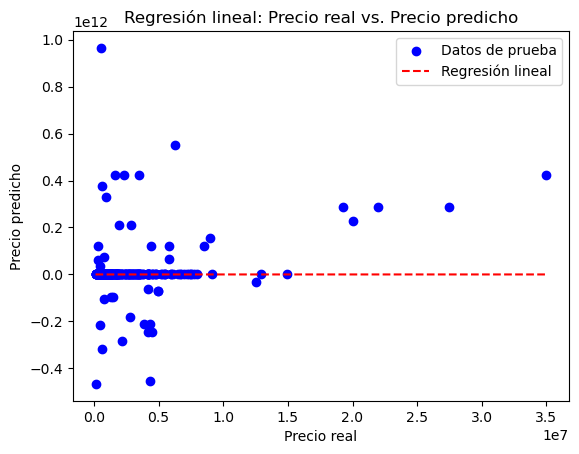

In [16]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos de prueba
ax.scatter(y_test, predictions, color='blue', label='Datos de prueba')

# Graficar la línea de regresión lineal
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regresión lineal')

# Etiquetas y título
ax.set_xlabel('Precio real')
ax.set_ylabel('Precio predicho')
ax.set_title('Regresión lineal: Precio real vs. Precio predicho')

# Leyenda
ax.legend()
# Mostrar la gráfica
plt.show()